## Khám phá và làm sạch dữ liệu




In [81]:
#khai bao thu vien
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import glob
import urllib.request
import xarray as xr
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

In [82]:
df = pd.read_csv('Data.csv')
df.head(121)

,province,max,min,wind,wind_d,rain,humidi,cloud,pressure,date
0,Ha Noi,19,12,6,NNE,0.0,70,44,1025,01/01/2009
1,Ha Noi,18,12,6,ESE,0.5,65,28,1025,02/01/2009
2,Ha Noi,20,13,5,ESE,0.7,74,40,1022,03/01/2009
3,Ha Noi,25,12,5,SSW,0.0,81,46,1018,04/01/2009
4,Ha Noi,23,14,5,S,1.3,90,75,1017,05/01/2009
...,...,...,...,...,...,...,...,...,...,...
116,Ha Noi,31,22,8,SE,0.0,67,33,1013,27/04/2009
117,Ha Noi,29,22,8,ESE,1.1,79,78,1013,28/04/2009
118,Ha Noi,24,23,8,ESE,14.1,95,91,1013,29/04/2009
119,Ha Noi,26,23,8,ESE,2.4,90,87,1013,30/04/2009


In [83]:
df.info()
#không có dữ liệu nào bị thiếu


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4549 entries, 0 to 4548
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   province  4549 non-null   object 
 1   max       4549 non-null   int64  
 2   min       4549 non-null   int64  
 3   wind      4549 non-null   int64  
 4   wind_d    4549 non-null   object 
 5   rain      4549 non-null   float64
 6   humidi    4549 non-null   int64  
 7   cloud     4549 non-null   int64  
 8   pressure  4549 non-null   int64  
 9   date      4549 non-null   object 
dtypes: float64(1), int64(6), object(3)
memory usage: 355.5+ KB


In [84]:
df.dtypes

province     object
max           int64
min           int64
wind          int64
wind_d       object
rain        float64
humidi        int64
cloud         int64
pressure      int64
date         object
dtype: object

In [85]:
df.isna().sum()
#không có dữ liệu nào bị thiếu

province    0
max         0
min         0
wind        0
wind_d      0
rain        0
humidi      0
cloud       0
pressure    0
date        0
dtype: int64

In [86]:
df2 = pd.DataFrame(df,columns=['date'])
df['date'] = pd.to_datetime(df['date'])
df['year'] = df.date.dt.year
df['month'] = df.date.dt.month
years = df['year'].unique()
df.head(15)

<ipython-input-86-a14679810245>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['date'] = pd.to_datetime(df['date'])


,province,max,min,wind,wind_d,rain,humidi,cloud,pressure,date,year,month
0,Ha Noi,19,12,6,NNE,0.0,70,44,1025,2009-01-01,2009,1
1,Ha Noi,18,12,6,ESE,0.5,65,28,1025,2009-02-01,2009,2
2,Ha Noi,20,13,5,ESE,0.7,74,40,1022,2009-03-01,2009,3
3,Ha Noi,25,12,5,SSW,0.0,81,46,1018,2009-04-01,2009,4
4,Ha Noi,23,14,5,S,1.3,90,75,1017,2009-05-01,2009,5
5,Ha Noi,23,15,5,E,2.2,88,59,1018,2009-06-01,2009,6
6,Ha Noi,15,13,9,NNE,1.1,85,95,1023,2009-07-01,2009,7
7,Ha Noi,15,12,8,E,0.5,78,91,1026,2009-08-01,2009,8
8,Ha Noi,19,11,10,SE,0.1,61,23,1029,2009-09-01,2009,9
9,Ha Noi,22,8,6,ENE,0.0,50,2,1027,2009-10-01,2009,10


In [87]:
df = df.drop_duplicates(subset=['year','month'])
df2 = df.pivot(index='month',columns='year' , values = 'max')


 * Trực quan hóa 

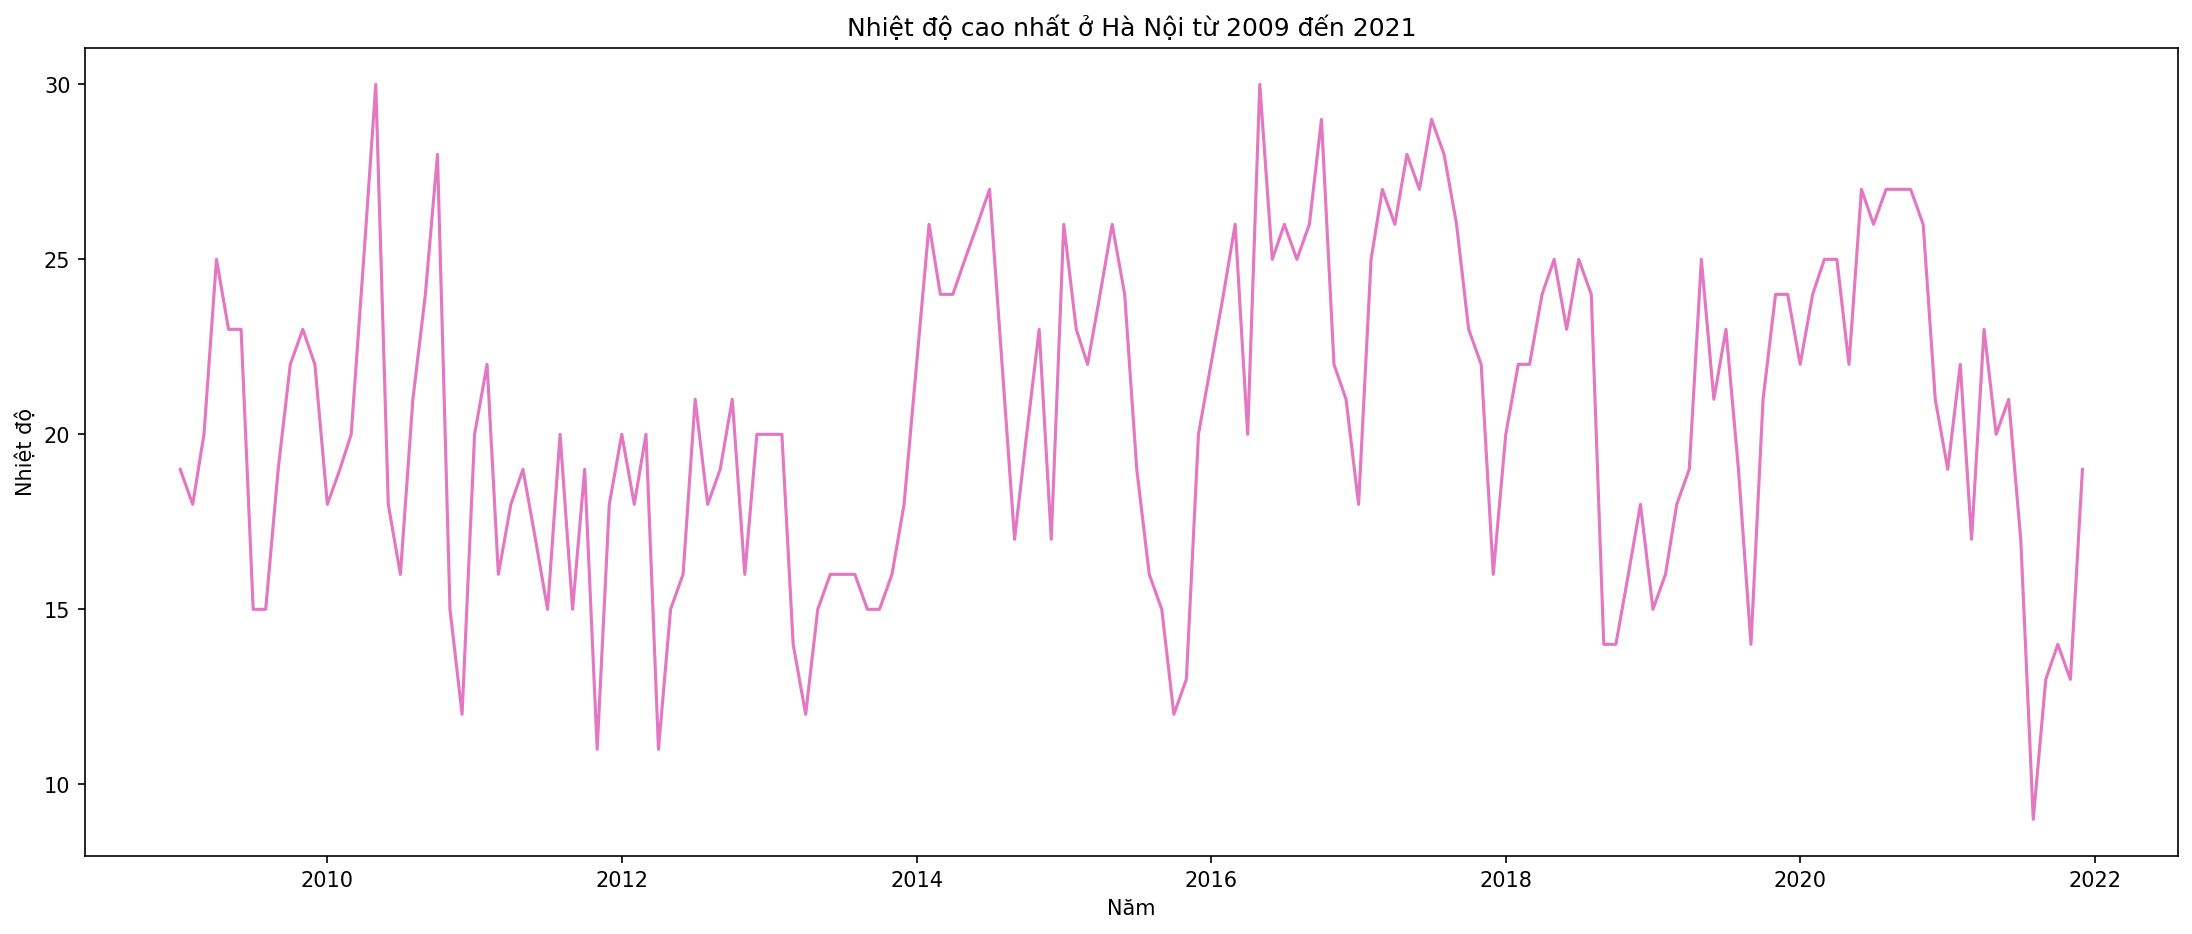

In [88]:
def plot_df(df, x,y, title="", xlabel='Năm', ylabel='Nhiệt độ', dpi=150, color="blue"):
    plt.figure(figsize=(18,7), dpi=dpi)
    plt.plot(x, y, color=color)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    
plot_df(df,x=df['date'], y=df['max'], title='Nhiệt độ cao nhất ở Hà Nội từ 2009 đến 2021', color="tab:pink")

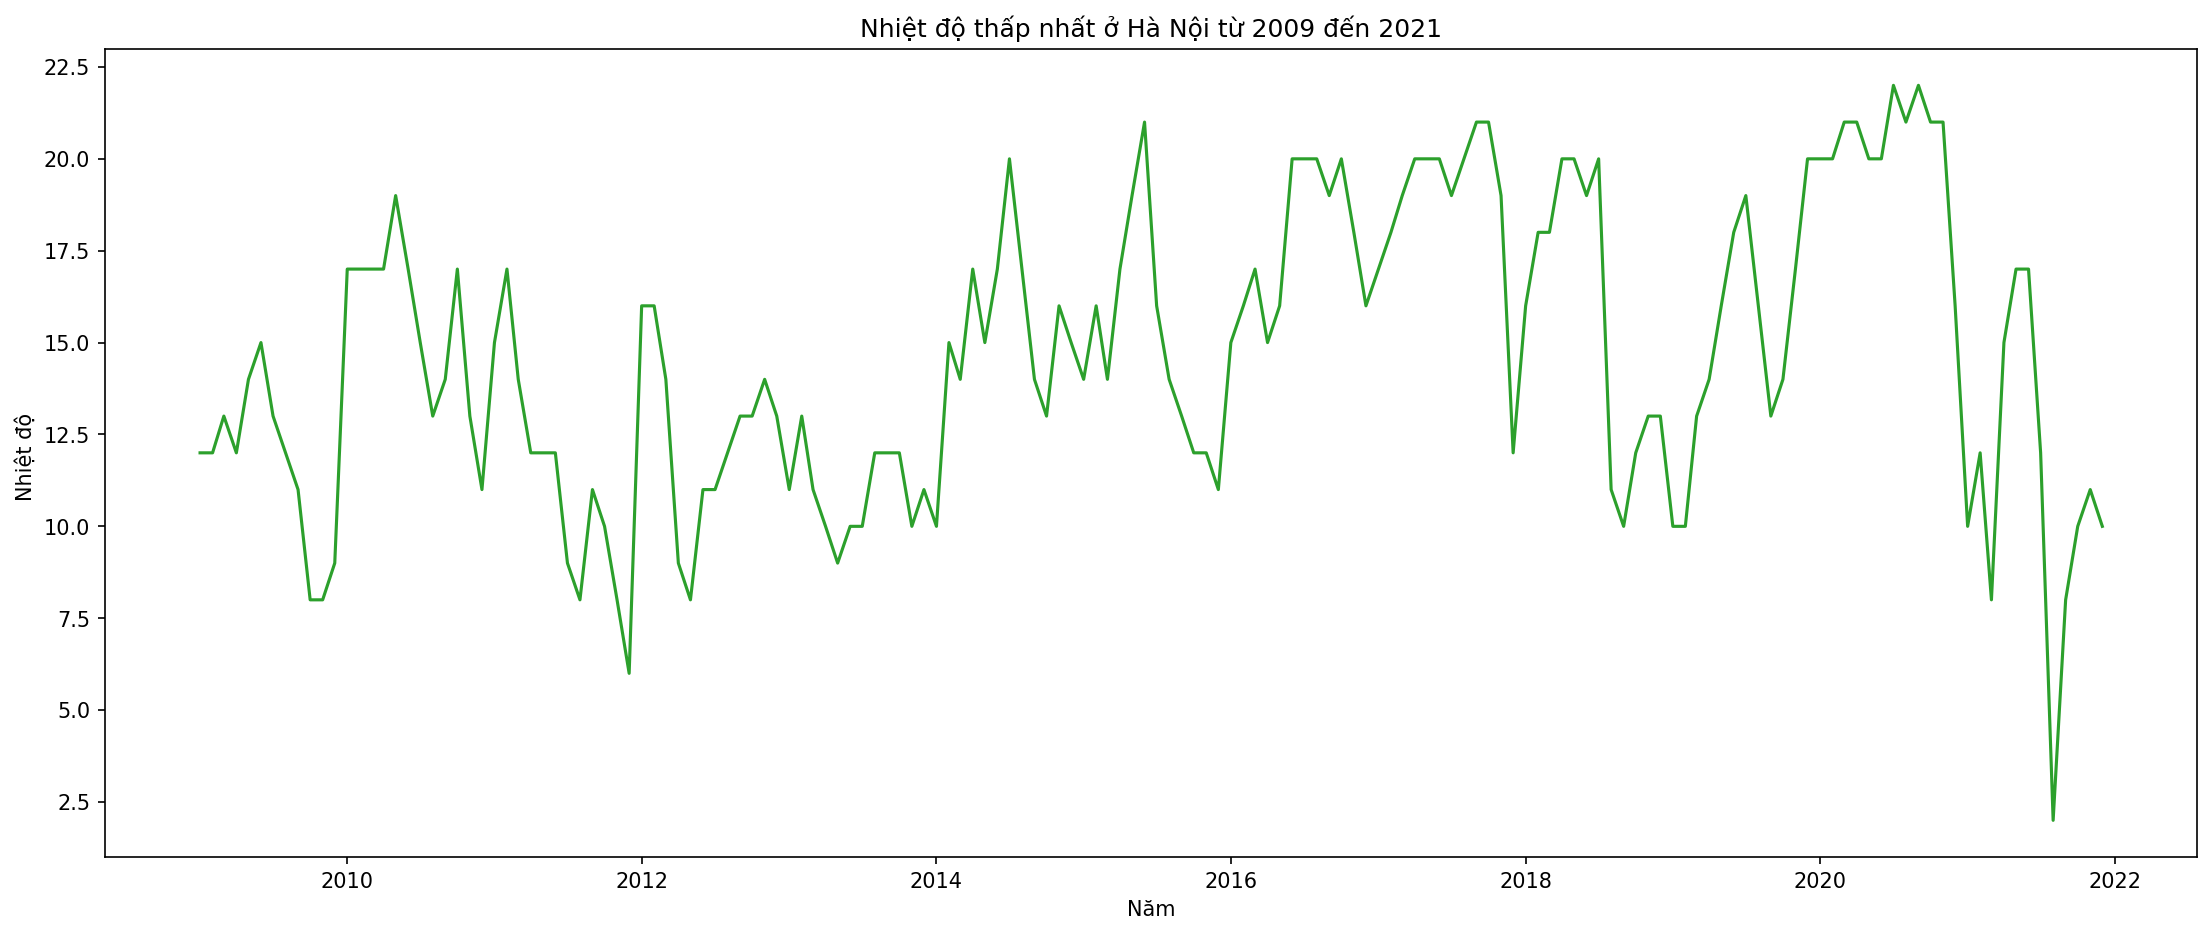

In [89]:
def plot_df(df, x,y, title="", xlabel='Năm', ylabel='Nhiệt độ ', dpi=150, color="blue"):
    plt.figure(figsize=(18,7), dpi=dpi)
    plt.plot(x, y, color=color)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    
plot_df(df,x=df['date'], y=df['min'], title='Nhiệt độ thấp nhất ở Hà Nội từ 2009 đến 2021', color="tab:green")

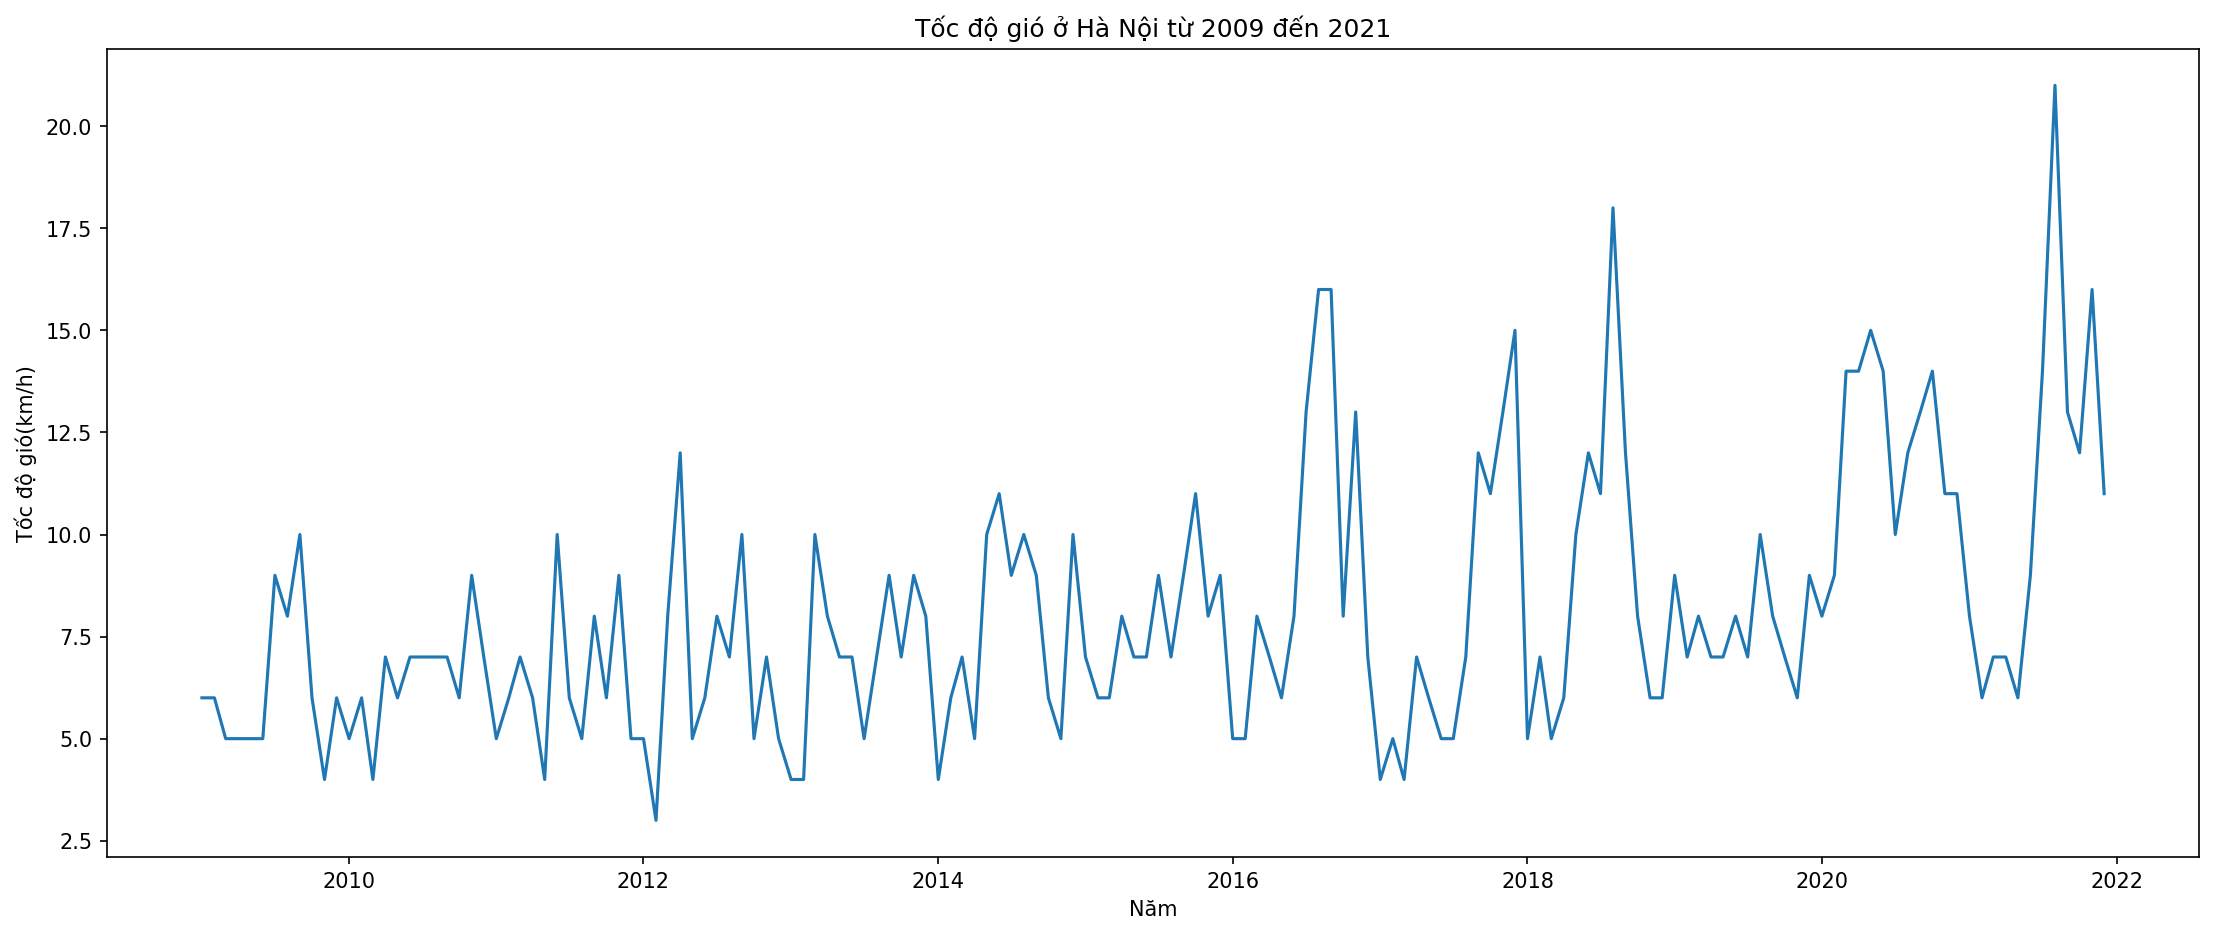

In [90]:
def plot_df(df, x,y, title="", xlabel='Năm', ylabel='Tốc độ gió(km/h)', dpi=150, color="blue"):
    plt.figure(figsize=(18,7), dpi=dpi)
    plt.plot(x, y, color=color)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    
plot_df(df,x=df['date'], y=df['wind'], title='Tốc độ gió ở Hà Nội từ 2009 đến 2021', color="tab:blue")

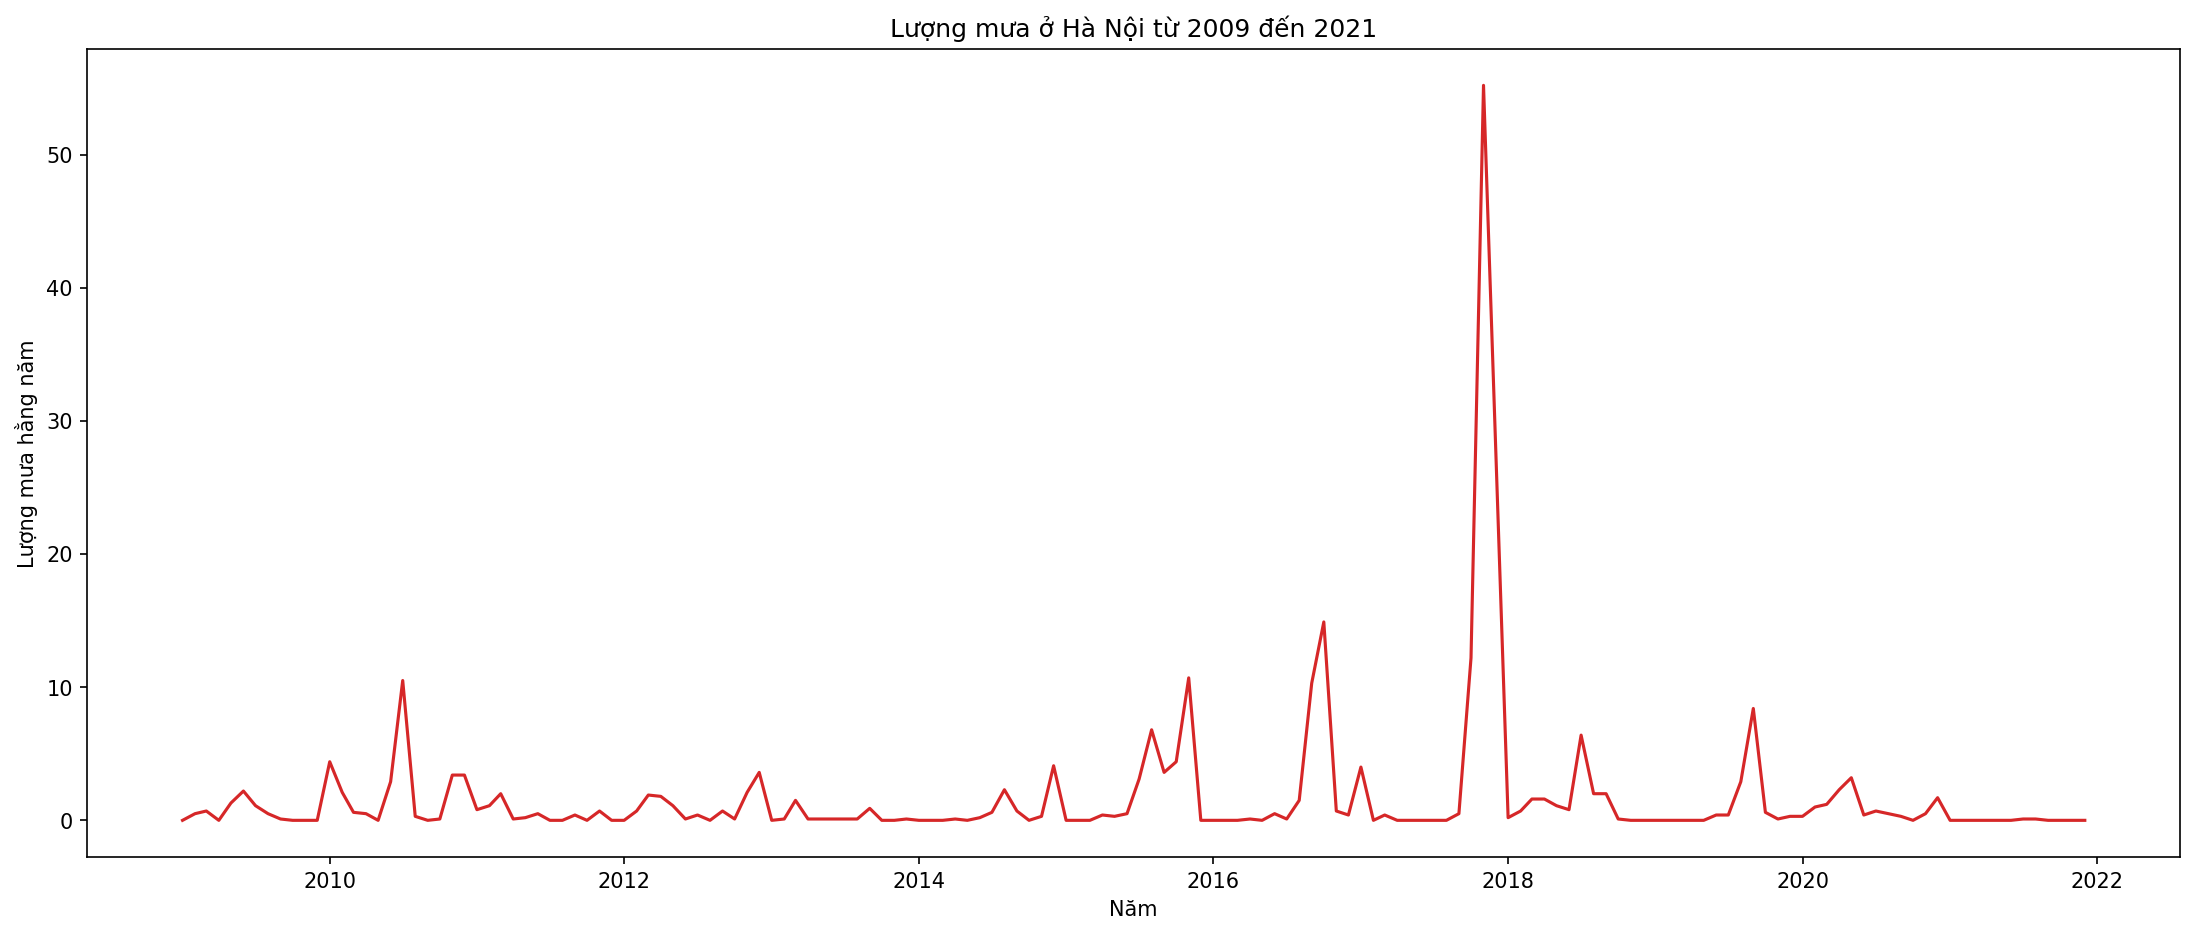

In [91]:
def plot_df(df, x,y, title="", xlabel='Năm', ylabel='Lượng mưa hằng năm', dpi=150, color="red"):
    plt.figure(figsize=(18,7), dpi=dpi)
    plt.plot(x, y, color=color)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    
plot_df(df,x=df['date'], y=df['rain'], title='Lượng mưa ở Hà Nội từ 2009 đến 2021', color="tab:red")

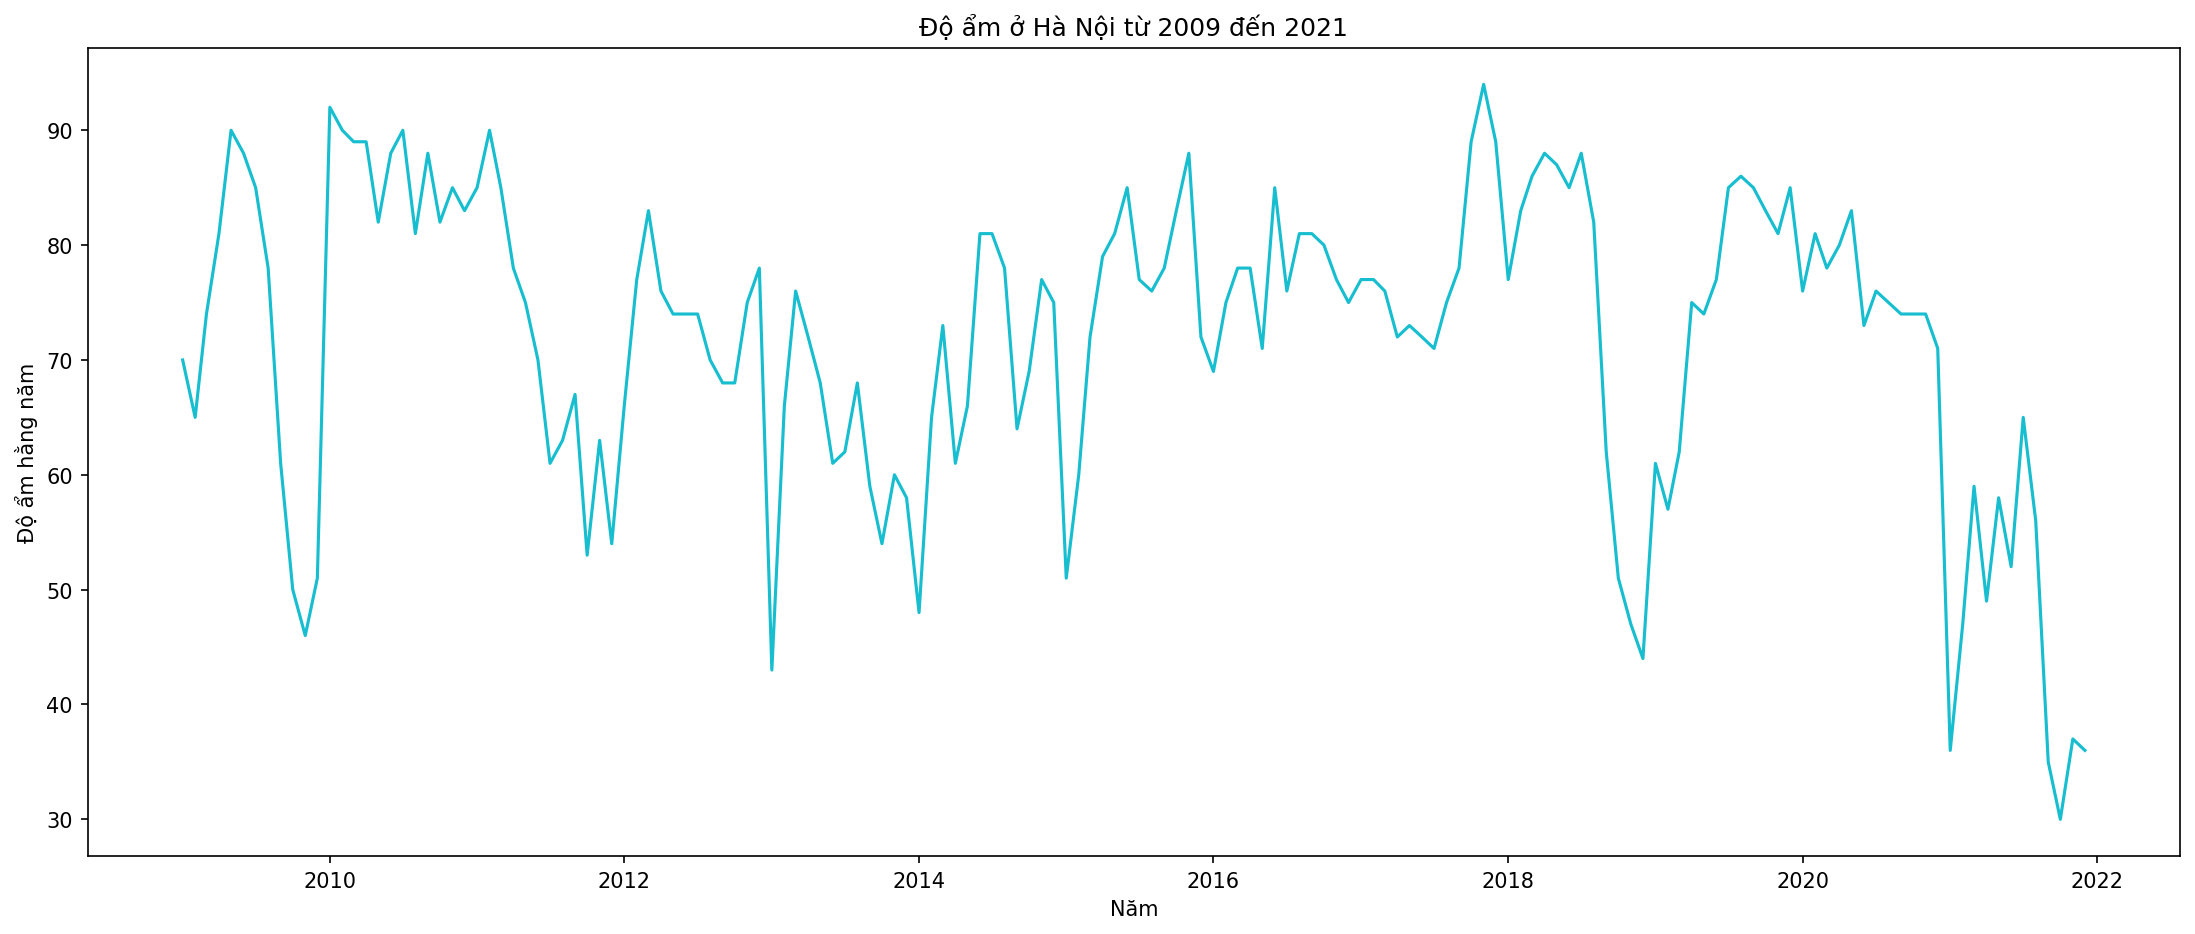

In [92]:
def plot_df(df, x,y, title="", xlabel='Năm', ylabel='Độ ẩm hằng năm', dpi=150, color="cyan"):
    plt.figure(figsize=(18,7), dpi=dpi)
    plt.plot(x, y, color=color)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    
plot_df(df,x=df['date'], y=df['humidi'], title='Độ ẩm ở Hà Nội từ 2009 đến 2021', color="tab:cyan")

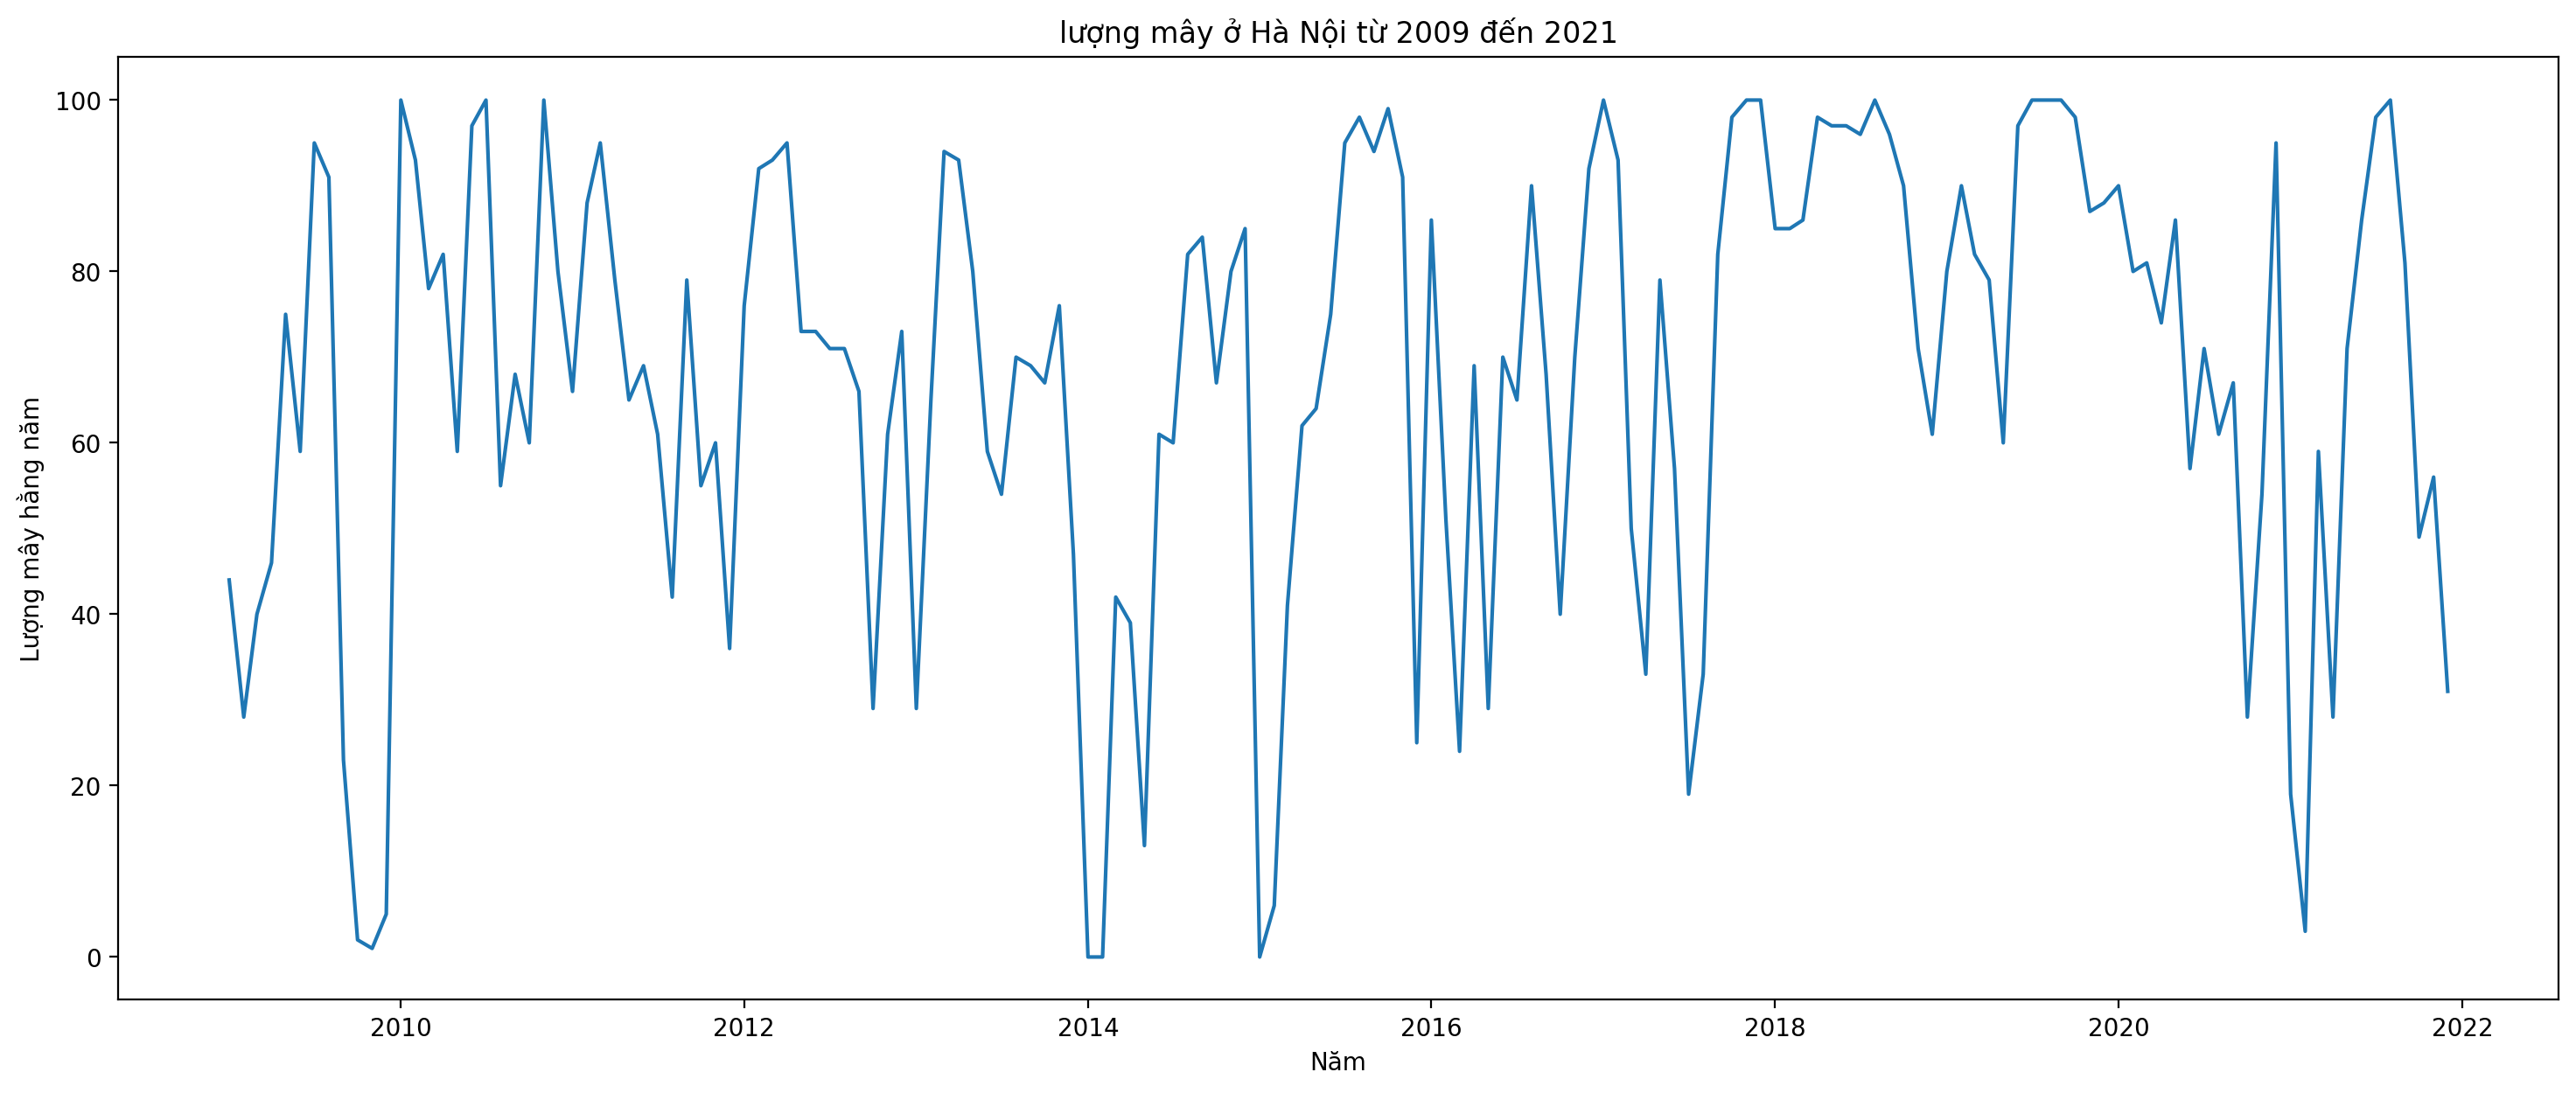

In [93]:
def plot_df(df, x,y, title="", xlabel='Năm', ylabel='Lượng mây hằng năm', dpi=200, color="blue"):
    plt.figure(figsize=(18,7), dpi=dpi)
    plt.plot(x, y, color=color)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    
plot_df(df,x=df['date'], y=df['cloud'], title='lượng mây ở Hà Nội từ 2009 đến 2021', color="tab:blue")

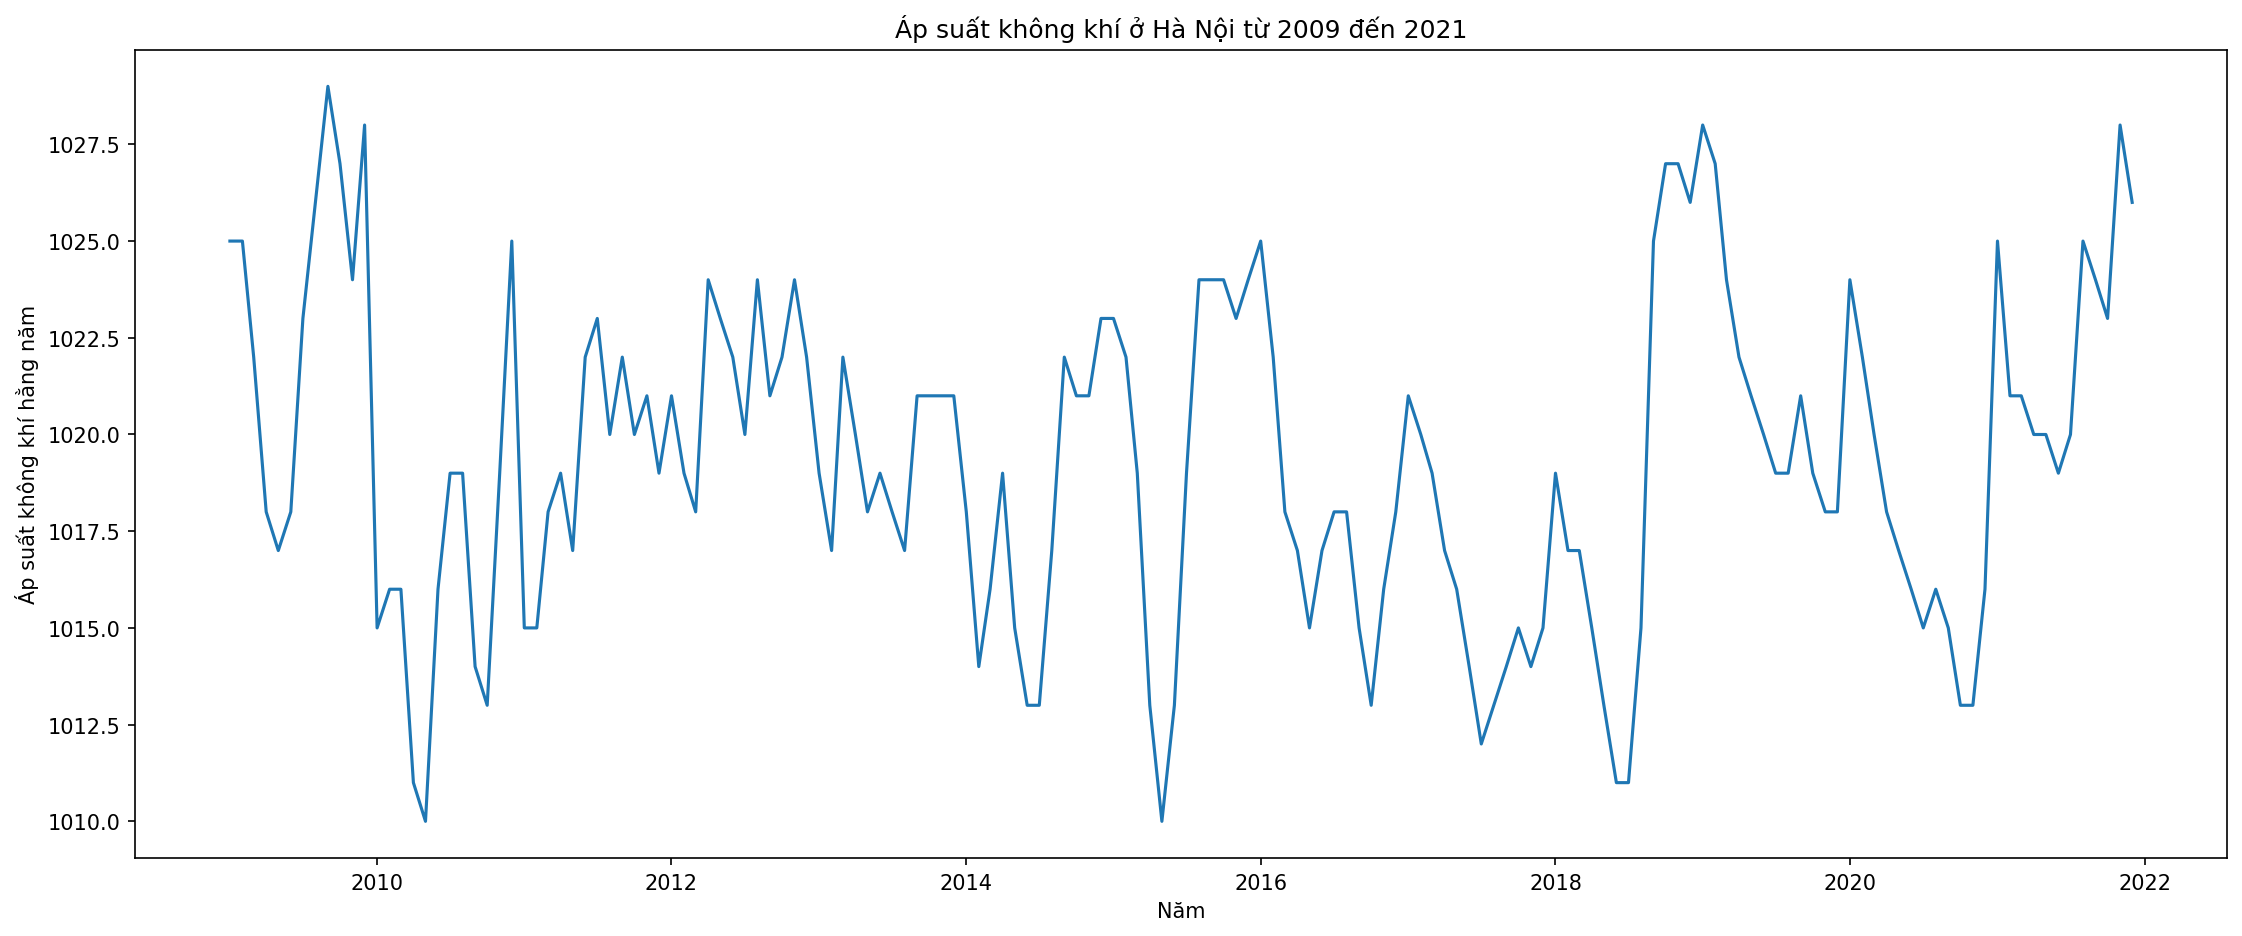

In [94]:
def plot_df(df, x,y, title="", xlabel='Năm', ylabel='Áp suất không khí hằng năm', dpi=150, color="blue"):
    plt.figure(figsize=(18,7), dpi=dpi)
    plt.plot(x, y, color=color)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    
plot_df(df,x=df['date'], y=df['pressure'], title='Áp suất không khí ở Hà Nội từ 2009 đến 2021', color="tab:blue")

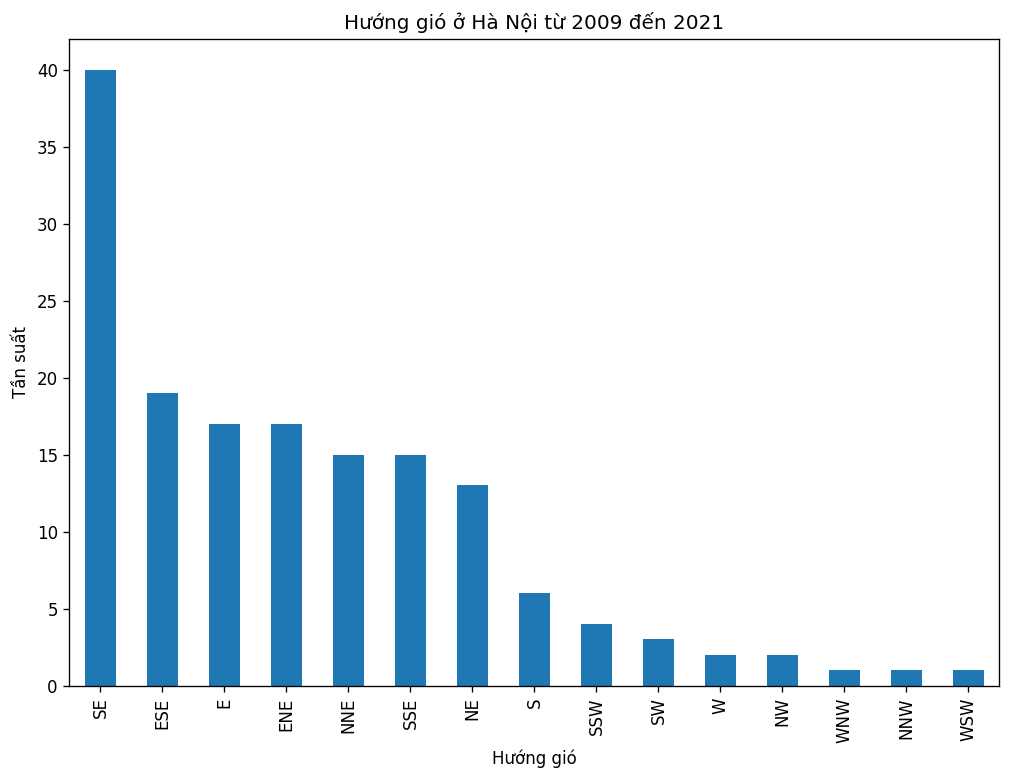

In [95]:
series = pd.Series(df['wind_d'])
frequency = series.value_counts()
frequency.plot.bar()
plt.xlabel('Hướng gió')
plt.ylabel('Tần suất')
plt.title('Hướng gió ở Hà Nội từ 2009 đến 2021')
plt.show()

- xác định xu hướng khí hậu theo hằng năm và hằng tháng


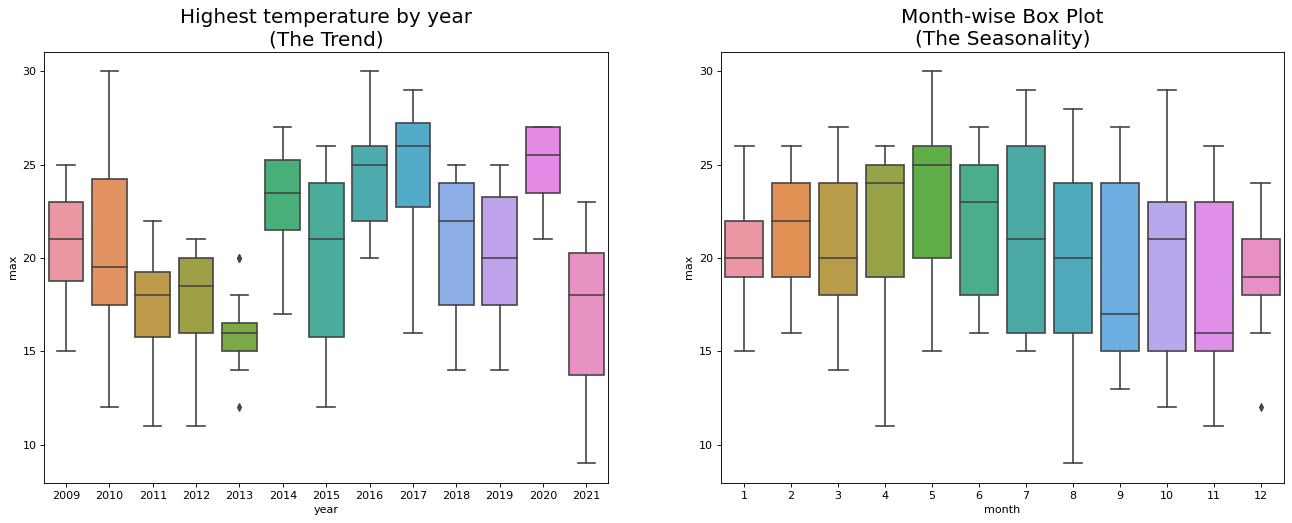

In [96]:
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='max', data=df, ax=axes[0])
sns.boxplot(x='month', y='max', data=df)

axes[0].set_title('Highest temperature by year\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

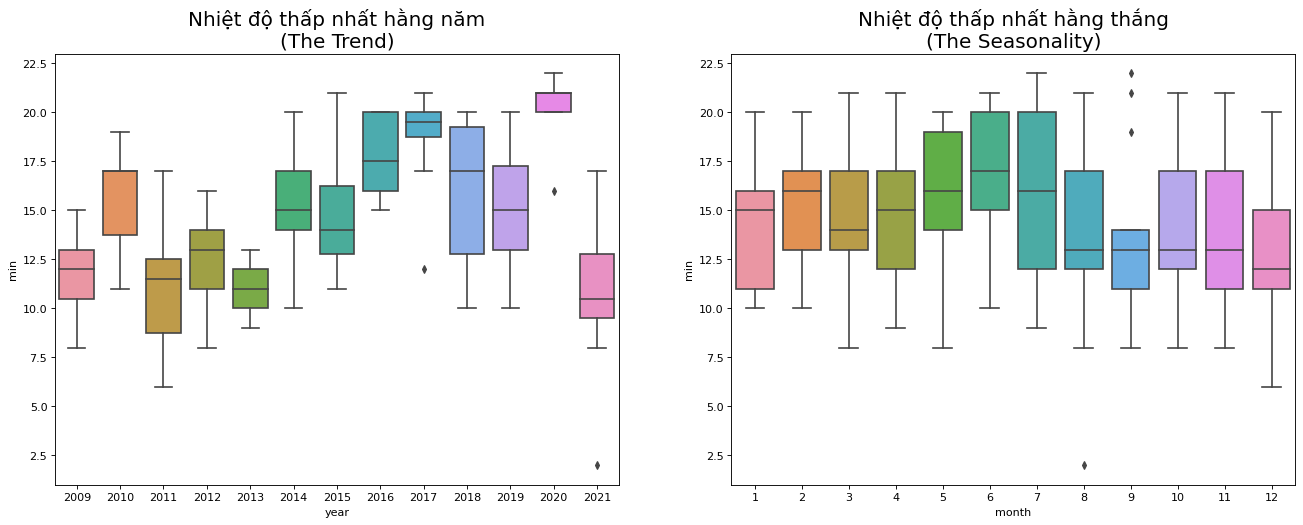

In [97]:
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='min', data=df, ax=axes[0])
sns.boxplot(x='month', y='min', data=df)

axes[0].set_title('Nhiệt độ thấp nhất hằng năm\n(The Trend)', fontsize=18); 
axes[1].set_title('Nhiệt độ thấp nhất hằng thắng\n(The Seasonality)', fontsize=18)
plt.show()

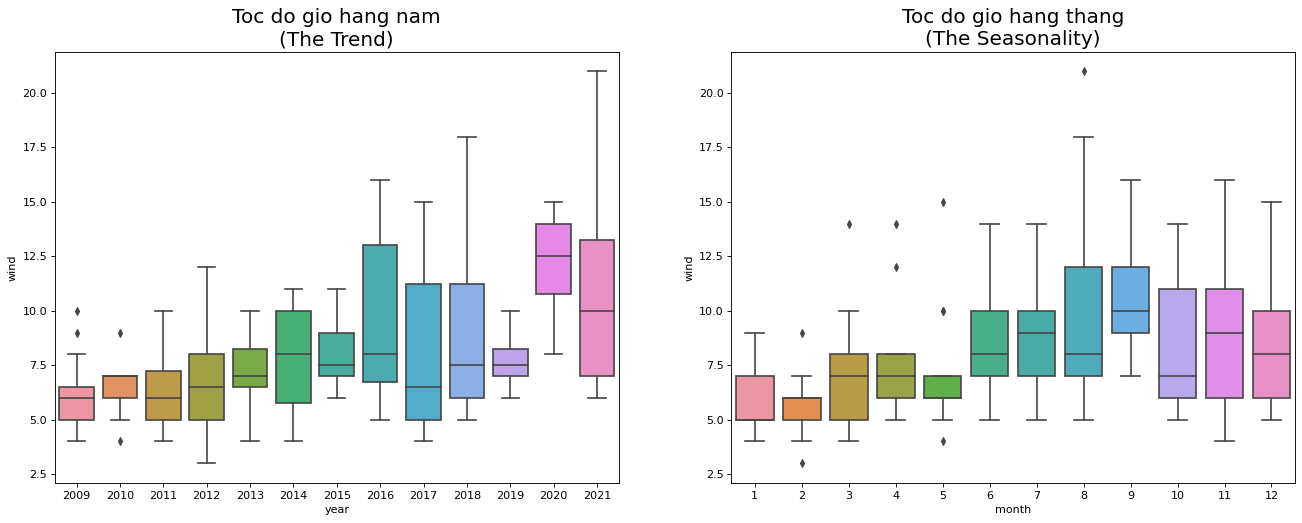

In [98]:
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='wind', data=df, ax=axes[0])
sns.boxplot(x='month', y='wind', data=df)

axes[0].set_title('Toc do gio hang nam\n(The Trend)', fontsize=18); 
axes[1].set_title('Toc do gio hang thang\n(The Seasonality)', fontsize=18)
plt.show()

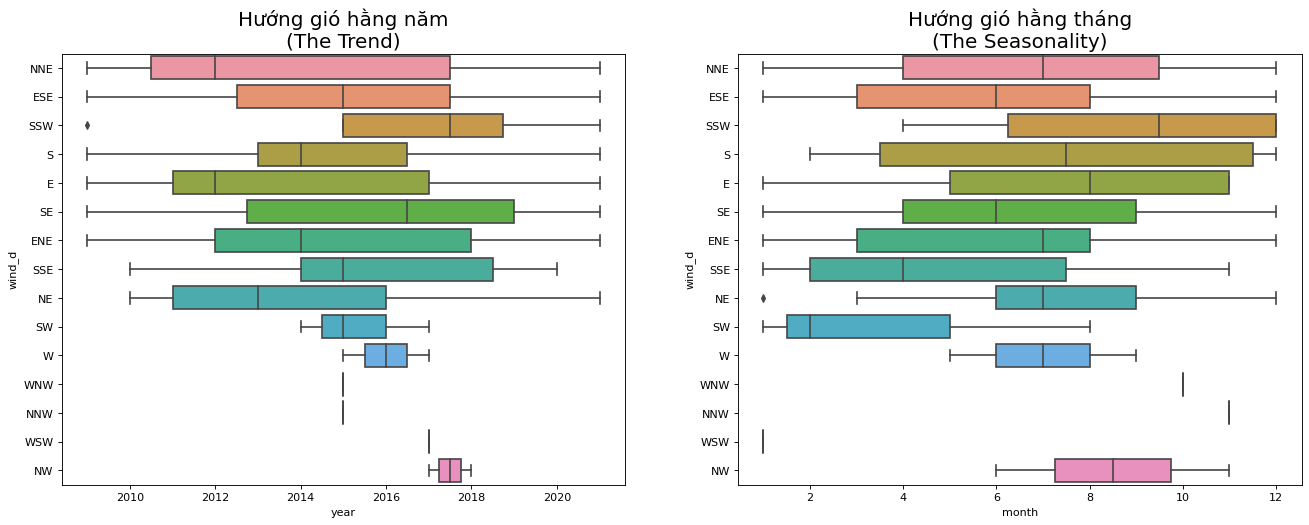

In [99]:
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='wind_d', data=df, ax=axes[0])
sns.boxplot(x='month', y='wind_d', data=df)

axes[0].set_title('Hướng gió hằng năm\n(The Trend)', fontsize=18); 
axes[1].set_title('Hướng gió hằng tháng\n(The Seasonality)', fontsize=18)
plt.show()

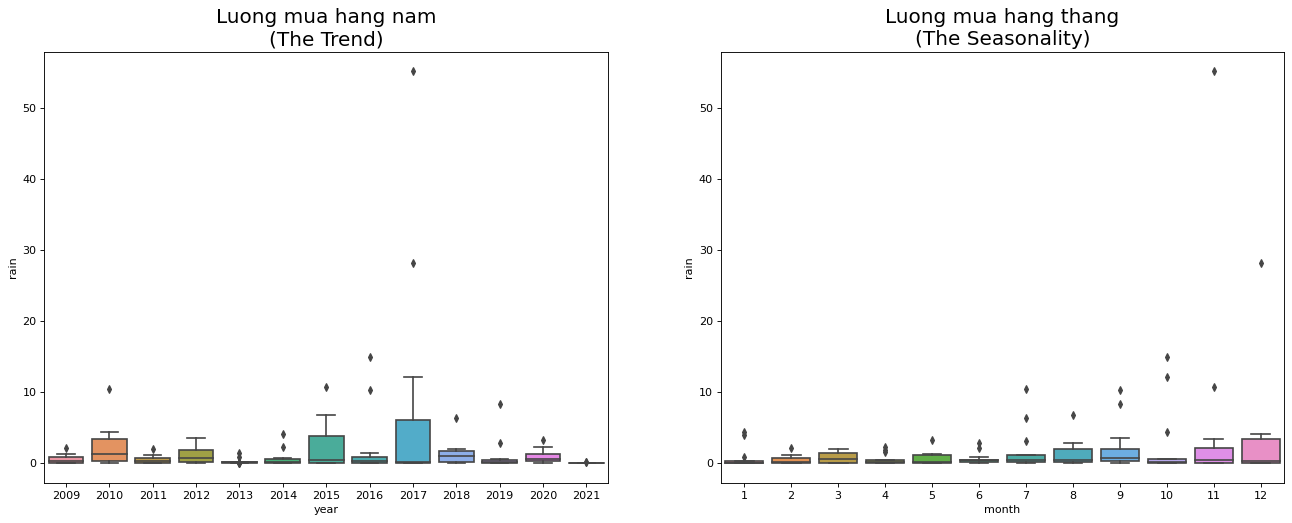

In [100]:
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='rain', data=df, ax=axes[0])
sns.boxplot(x='month', y='rain', data=df)

axes[0].set_title('Luong mua hang nam\n(The Trend)', fontsize=18); 
axes[1].set_title('Luong mua hang thang\n(The Seasonality)', fontsize=18)
plt.show()

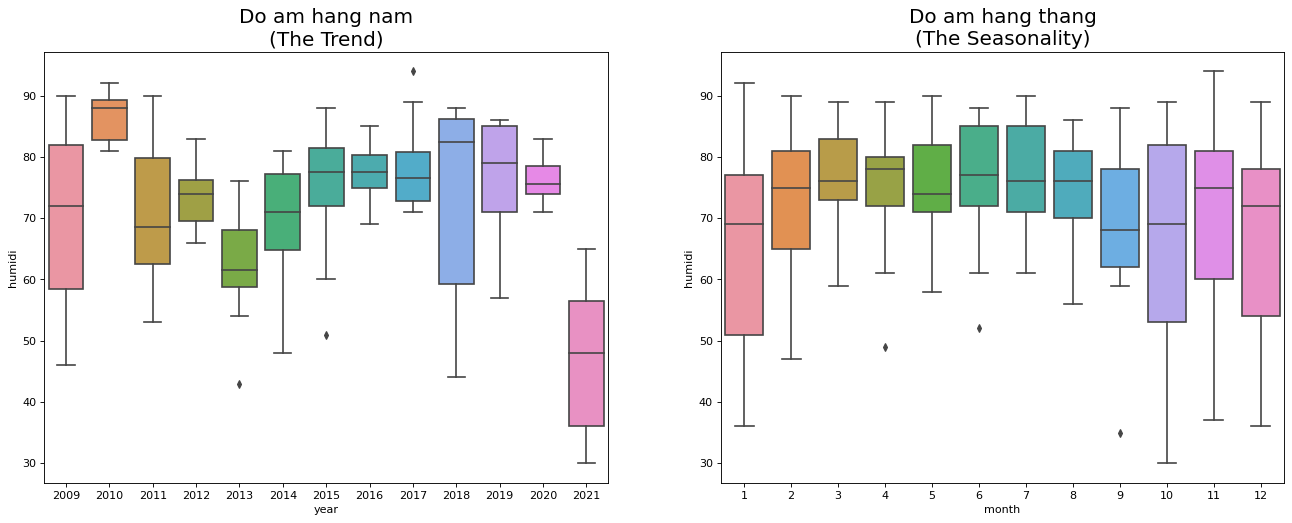

In [101]:
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='humidi', data=df, ax=axes[0])
sns.boxplot(x='month', y='humidi', data=df)

axes[0].set_title('Do am hang nam\n(The Trend)', fontsize=18); 
axes[1].set_title('Do am hang thang\n(The Seasonality)', fontsize=18)
plt.show()

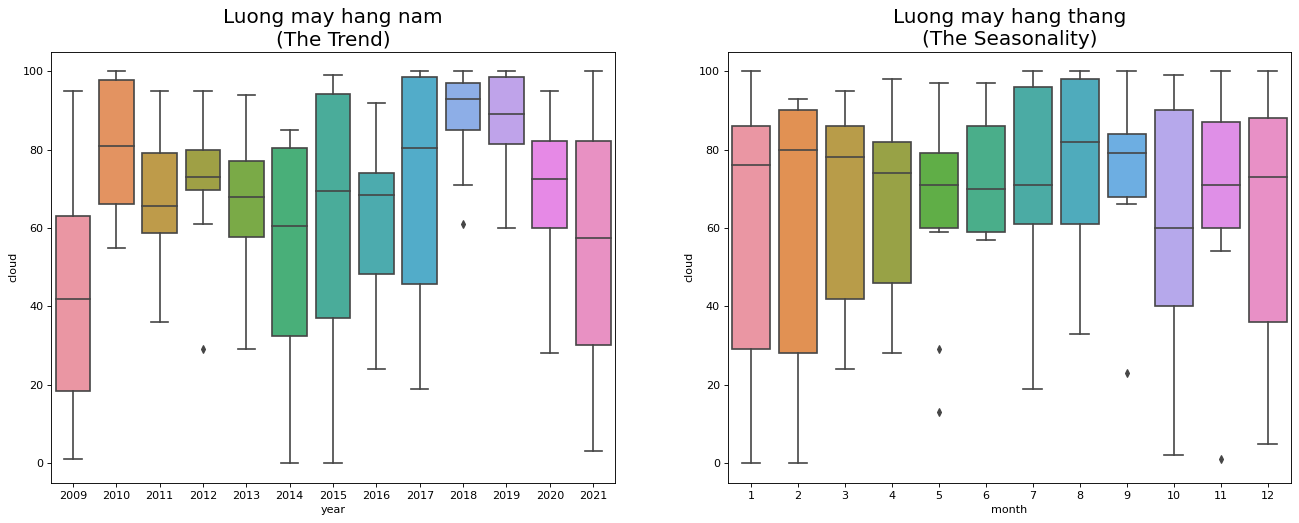

In [102]:
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='cloud', data=df, ax=axes[0])
sns.boxplot(x='month', y='cloud', data=df)

axes[0].set_title('Luong may hang nam\n(The Trend)', fontsize=18); 
axes[1].set_title('Luong may hang thang\n(The Seasonality)', fontsize=18)
plt.show()

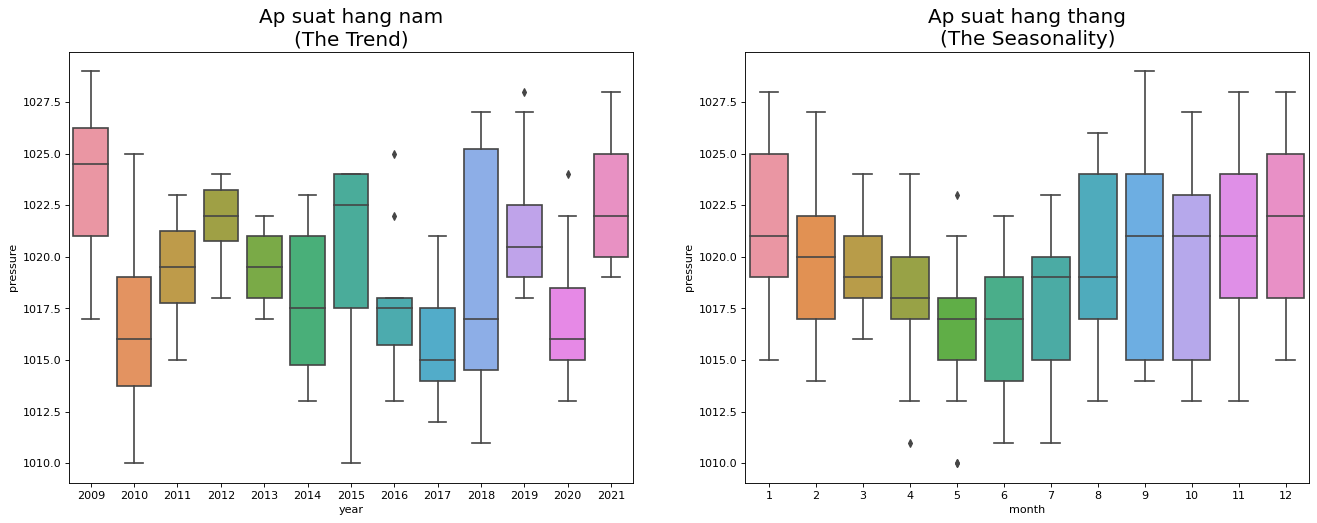

In [103]:
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='pressure', data=df, ax=axes[0])
sns.boxplot(x='month', y='pressure', data=df)

axes[0].set_title('Ap suat hang nam\n(The Trend)', fontsize=18); 
axes[1].set_title('Ap suat hang thang\n(The Seasonality)', fontsize=18)
plt.show()

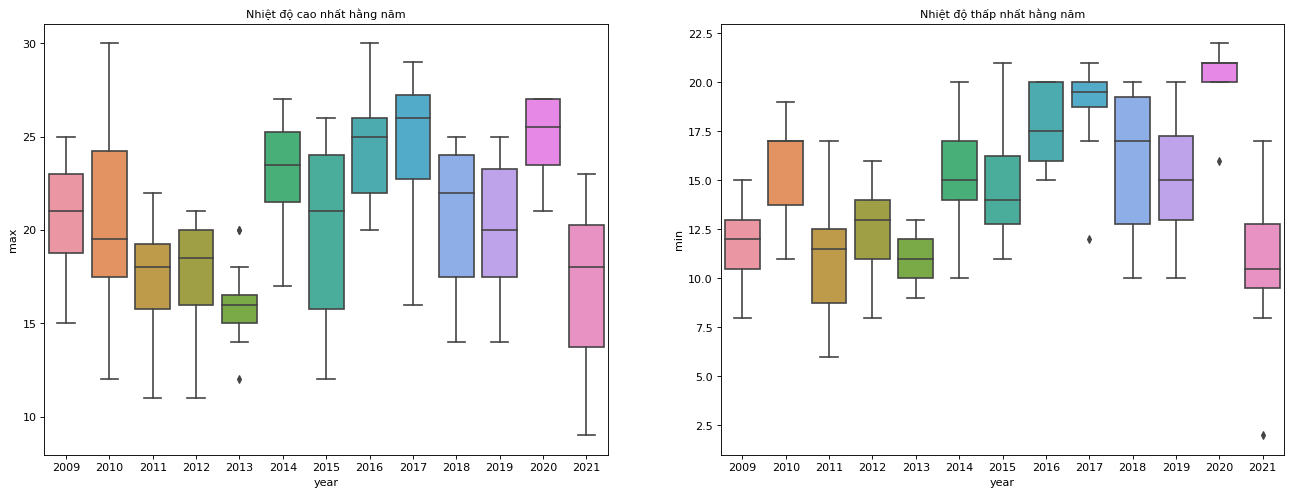

In [104]:
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='max', data=df, ax=axes[0])
sns.boxplot(x='year', y='min', data=df)

axes[0].set_title('Nhiệt độ cao nhất hằng năm', fontsize=10); 
axes[1].set_title('Nhiệt độ thấp nhất hằng năm', fontsize=10)
plt.show()